# UK COVID 19 Cases March 2020

In [17]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
def f(x, a, b):
    return a * np.exp(b * x)

In [19]:
# Uk Data from https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_the_United_Kingdom
# From 1/March/2020
uk_data = [35,40,51,85,114,160,206,271,321,373,456,590,798,1140,1372,1543,1950,2626,3269,3983,5018,5683,6650,8077,9529,11658]
spain_data = [84,125,169,228,282,365,430,674,1231,1695,2277,3146,5232,6391,7844,9191]
netherlands_data=[9,19,24,38,82,128,188,264,321,382,503,614,804,959,1135,1413]
italy_data = [1694,2036,2502,3089,3858,4636,5883,7375,9172,10149,12462,15113,17660,21157,24747,27980,31506,35713,41035,47021,53578,59138,63927,69176]
ireland_data = [1,1,2,6,13,18,19,21,24,34,43,70,90,129,169]
germany_data = [117,151,188,240,349,534,684,847,1112,1296,1567,2369,3062,3795,4838]
france_data = [130,191,212,285,423,613,949,1126,1412,1784,2281,2876,3661,4499,5423]
# fake_data = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
data = uk_data
# data = italy_data
diffs = [ b-a for (a,b) in zip(data,data[1:])]

In [20]:
n = len(data)
x = np.linspace(1, n, n)

## Confirmed Cases Least squares fit

In [21]:
(a, b), _ = opt.curve_fit(f, x, data)

Text(0, 0.5, 'Cumulative Cases')

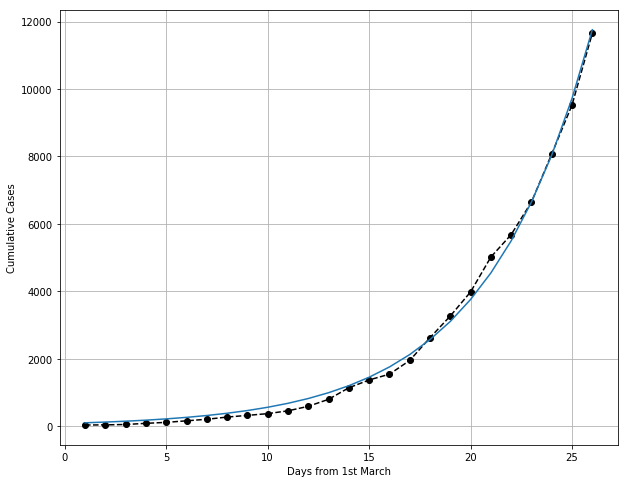

In [22]:
fig, ax = plt.subplots(1, figsize=(10, 8))
ax.plot(x, data, 'o--k')
y_fit = f(x, a, b)
ax.plot(x, y_fit, '-')
plt.grid()
plt.xlabel("Days from 1st March")
plt.ylabel("Cumulative Cases")


## Projection until End of March

Text(0, 0.5, 'Cumulative Cases')

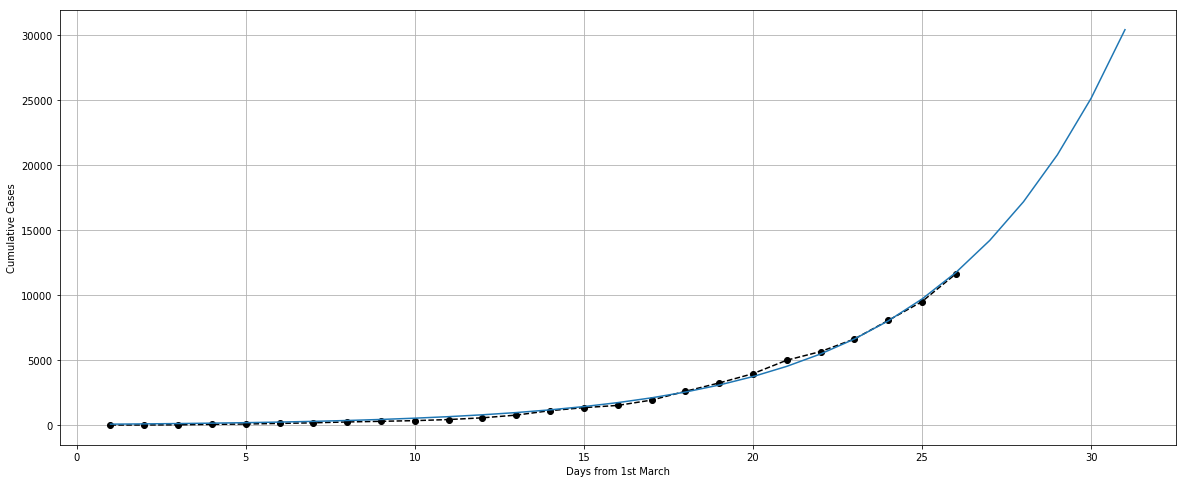

In [23]:
fig, ax = plt.subplots(1, figsize=(20, 8))
ax.plot(x, data, 'o--k')
x = np.linspace(1,31,31)
y_fit = f(x, a, b)
ax.plot(x, y_fit, '-')
plt.grid()
plt.xlabel("Days from 1st March")
plt.ylabel("Cumulative Cases")

In [24]:
print("curve is ", a , "* exp (" ,b, "* x)")

curve is  83.92850580178033 * exp ( 0.19009879346834743 * x)


In [25]:
tomorrow = a * np.exp ( b * (n+1))
print ("Tomorrows estimated cases:", tomorrow)

Tomorrows estimated cases: 14223.243031922597


## Mortality

Text(0, 0.5, 'Cumulative Deaths')

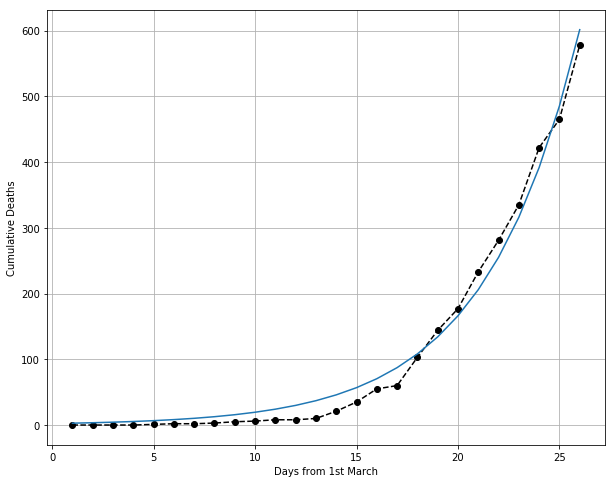

In [33]:
uk_mortalitydata = [0,0,0,0,1,2,2,3,5,6,8,8,10,21,35,55,60,103,144,177,233,281,335,422,465,578]
italy_mortalitydata = [29,34,52,79,107,148,197,233,366,463,631,827,1016,1266,1441,1809,2158,2503,2978,3405,4032,4825,5475,6077,6820]
uk_mortalitydata1 = uk_mortalitydata[5:]

mortalitydata = uk_mortalitydata
#mortalitydata = italy_mortalitydata

n = len(mortalitydata)
x = np.linspace(1, n, n)

(a, b), _ = opt.curve_fit(f, x, mortalitydata)

fig, ax = plt.subplots(1, figsize=(10, 8))
ax.plot(x, mortalitydata, 'o--k')
y_fit = f(x, a, b)
ax.plot(x, y_fit, '-')
plt.grid()
plt.xlabel("Days from 1st March")
plt.ylabel("Cumulative Deaths")

In [34]:
print("curve is ", a , "* exp (" ,b, "* x)")

curve is  2.279576896682759 * exp ( 0.21443436173018068 * x)


In [35]:
tomorrow = a * np.exp ( b * (n+1))
print ("Tomorrows estimated deaths:", tomorrow)

Tomorrows estimated deaths: 745.2484262364685


## Mortality Projections until end of March

Text(0, 0.5, 'Cumulative Mortalities')

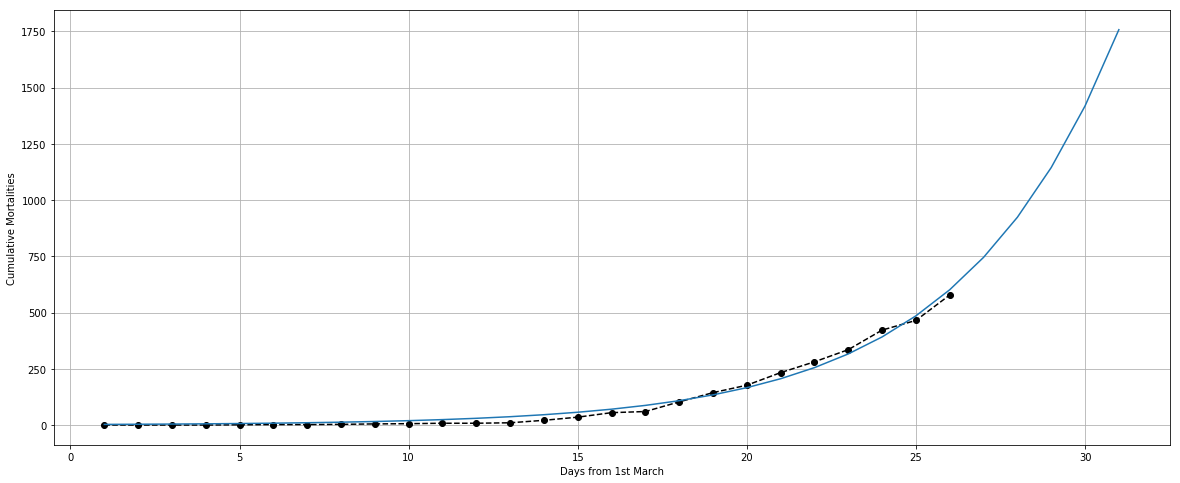

In [36]:
fig, ax = plt.subplots(1, figsize=(20, 8))
ax.plot(x, mortalitydata, 'o--k')
x = np.linspace(1,31,31)
y_fit = f(x, a, b)
ax.plot(x, y_fit, '-')
plt.grid()
plt.xlabel("Days from 1st March")
plt.ylabel("Cumulative Mortalities")

## Actual number of infections estimate

Text(0, 0.5, 'Estimated actual infected people')

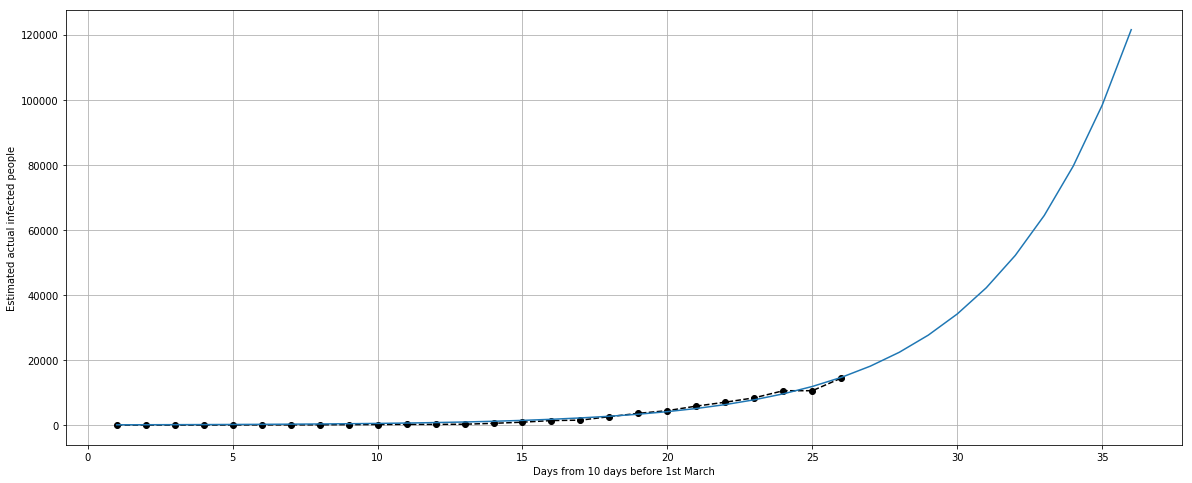

In [30]:
days_from_infection_to_death = 10 # assume 5 days for infection 5 days to die (people are already ill)
mortality_rate1 = 0.01 # 1%
mortality_rate2 = 0.02 # 2%
mortality_rate3 = 0.03 # 3%
mortality_rate4 = 0.04 # 4%
mortality_rate10 = 0.1 # 10%

inv_mortality = 1/mortality_rate4
estimated_actual = list (map(lambda x: x * inv_mortality, mortalitydata))
n = len(estimated_actual)
x = np.linspace(1, n, n)

(a, b), _ = opt.curve_fit(f, x, estimated_actual)

fig, ax = plt.subplots(1, figsize=(20, 8))
ax.plot(x, estimated_actual, 'o--k')
x = np.linspace(1,n+days_from_infection_to_death,n+days_from_infection_to_death)
y_fit = f(x, a, b)
ax.plot(x, y_fit, '-')
plt.grid()
plt.xlabel("Days from " + str(days_from_infection_to_death) + " days before 1st March")
plt.ylabel("Estimated actual infected people")

In [31]:
print("curve is ", a , "* exp (" ,b, "* x)")

curve is  59.856653428803845 * exp ( 0.21155722380477157 * x)


In [32]:
infected_today = a * np.exp ( b * (days_from_infection_to_death + len(estimated_actual)  ))
print ("Estimated that: ", infected_today, "are infected today")

Estimated that:  121541.69494894955 are infected today
